In [5]:
import lbforaging
from games.foraging import Foraging 
import numpy as np
import time
from agents.random_agent import RandomAgent
from agents.independent_q_learning import IQL

# Training IQL using the Marl Book's example of Foraging configuration

In [6]:
game = Foraging(config="Foraging-11x11-2p-2f-v3", seed=1)
# game.reset()
# game.render()

c:\Users\marrt\miniconda3\envs\pettingzoo_games\Lib\site-packages\gymnasium\spaces\box.py:130: UserWarning: WARN: Box bound precision lowered by casting to float32
  gym.logger.warn(f"Box bound precision lowered by casting to {self.dtype}")


In [7]:
# game = Foraging(config="Foraging-11x11-2p-2f-v3", seed=120)
# game.reset()
# game.render()

In [8]:
game.reset()

#print game information
rewards = game.rewards
observations = game.observations
terminations = game.terminations
truncations = game.truncations
infos = game.infos
print("Game Information:")
print("Rewards: ", rewards)
print("Observations: ", observations)
print("Terminations: ", terminations)

print("Truncations: ", truncations)
print("Infos: ", infos)

Game Information:
Rewards:  {'agent_0': 0, 'agent_1': 0}
Observations:  {'agent_0': array([3., 3., 4., 8., 3., 2., 5., 8., 2., 0., 1., 2.], dtype=float32), 'agent_1': array([3., 3., 4., 8., 3., 2., 0., 1., 2., 5., 8., 2.], dtype=float32)}
Terminations:  {'agent_0': False, 'agent_1': False}
Truncations:  {'agent_0': False, 'agent_1': False}
Infos:  {'agent_0': {}, 'agent_1': {}}


## Funcion de epsilon utilizada en el libro

In [9]:
decay_steps = 80000
max_value = 1.0
min_value = 0.05
values = []

for i in range(0, 1000000):
        # Epsilon function
    if i < decay_steps:
        # Linearly decay epsilon
        values.append(max_value - (max_value - min_value) * (i / decay_steps))
    else:
        # Keep epsilon at min_value after decay_steps
        values.append(min_value)


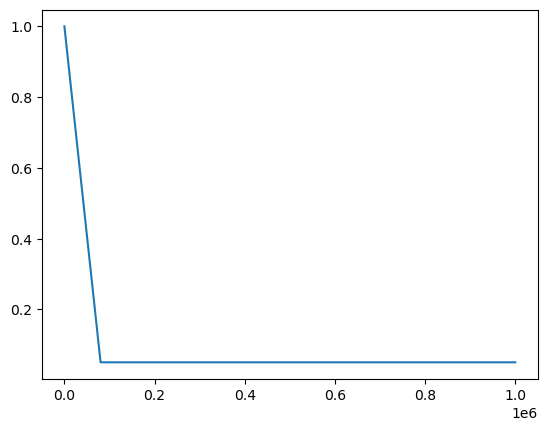

In [10]:
import matplotlib.pyplot as plt

plt.plot(values)

In [11]:
def run(game, agents, verbose=False, render=False):

    # Initialize the game
    game.reset()

    # Initialize rewards for each agent
    cum_rewards = dict(map(lambda agent: (agent, 0), game.agents))

    # render the game if required
    if render:
        game.render()
        time.sleep(0.5)

    while not game.done():

        # Get actions from each agent
        actions = dict(map(lambda agent: (agent, agents[agent].action()), game.agents))

        # Perform the actions in the game
        game.step(actions)

        # Update the cum_rewards for each agent
        for agent in game.agents:
            agents[agent].update()
            cum_rewards[agent] += game.reward(agent)

        # Print the rewards if verbose is enabled
        if verbose:
            for agent in game.agents:
                    print(f"Agent {agent} reward: {game.reward(agent)}")
                    print(f"Agent {agent} observe: {game.observe(agent)}")
            
        if render:
            game.render()
            time.sleep(0.5)
        
    return cum_rewards

In [12]:
agents = {agent: IQL(game, agent) for agent in game.agents}
reward_list = {agent: [] for agent in game.agents}
reward_per_iteration = {agent: [] for agent in game.agents}

for i in range(1000000):
    #print(f"Run {i+1}")
    reward = run(game, agents, verbose=False, render=False)
    for agent in game.agents:
        reward_list[agent].append(reward[agent])

    if i % 1000 == 0:
        # store average reward for each agent in the last 100 runs
        for agent in game.agents:
            reward_per_iteration[agent].append(np.mean(reward_list[agent][-1000:]))

        print(f"Iteration {i/1000} average rewards:")
        for agent in game.agents:
            print(f"Agent {agent} average reward: {np.mean(reward_list[agent][-1000:])}")
            
        # print(f"Agent {agent} average reward: {np.mean(reward_list[agent])}")
        # print(f"Agent {agent} std reward: {np.std(reward_list[agent])}")
        # print(f"Agent {agent} min reward: {np.min(reward_list[agent])}")
        # print(f"Agent {agent} max reward: {np.max(reward_list[agent])}")
        

c:\Users\marrt\miniconda3\envs\pettingzoo_games\Lib\site-packages\gymnasium\utils\passive_env_checker.py:275: UserWarning: WARN: The reward returned by `step()` must be a float, int, np.integer or np.floating, actual type: <class 'list'>
  logger.warn(


Iteration 0.0 average rewards:
Agent agent_0 average reward: 0.0
Agent agent_1 average reward: 0.0
Iteration 1.0 average rewards:
Agent agent_0 average reward: 0.017333333333333333
Agent agent_1 average reward: 0.014
Iteration 2.0 average rewards:
Agent agent_0 average reward: 0.01633333333333333
Agent agent_1 average reward: 0.002333333333333333
Iteration 3.0 average rewards:
Agent agent_0 average reward: 0.005
Agent agent_1 average reward: 0.0003333333333333333
Iteration 4.0 average rewards:
Agent agent_0 average reward: 0.004666666666666666
Agent agent_1 average reward: 0.001
Iteration 5.0 average rewards:
Agent agent_0 average reward: 0.007666666666666666
Agent agent_1 average reward: 0.0016666666666666666
Iteration 6.0 average rewards:
Agent agent_0 average reward: 0.008333333333333331
Agent agent_1 average reward: 0.0013333333333333333
Iteration 7.0 average rewards:
Agent agent_0 average reward: 0.008333333333333331
Agent agent_1 average reward: 0.003333333333333333
Iteration 8.0

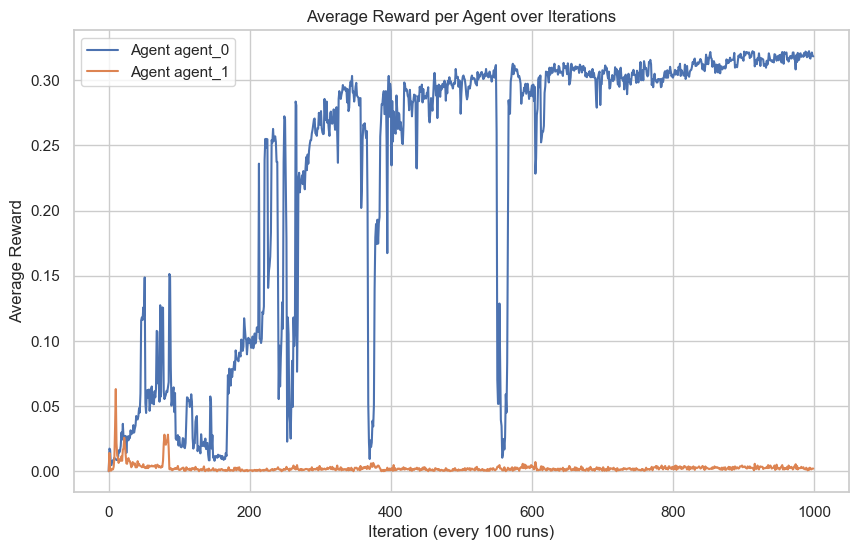

In [13]:
# plot reward per iteration for each agent
# plot reward per agent
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
for agent in game.agents:
    plt.plot(reward_per_iteration[agent], label=f"Agent {agent}")
plt.xlabel("Iteration (every 100 runs)")
plt.ylabel("Average Reward")
plt.title("Average Reward per Agent over Iterations")
plt.legend()
plt.show()

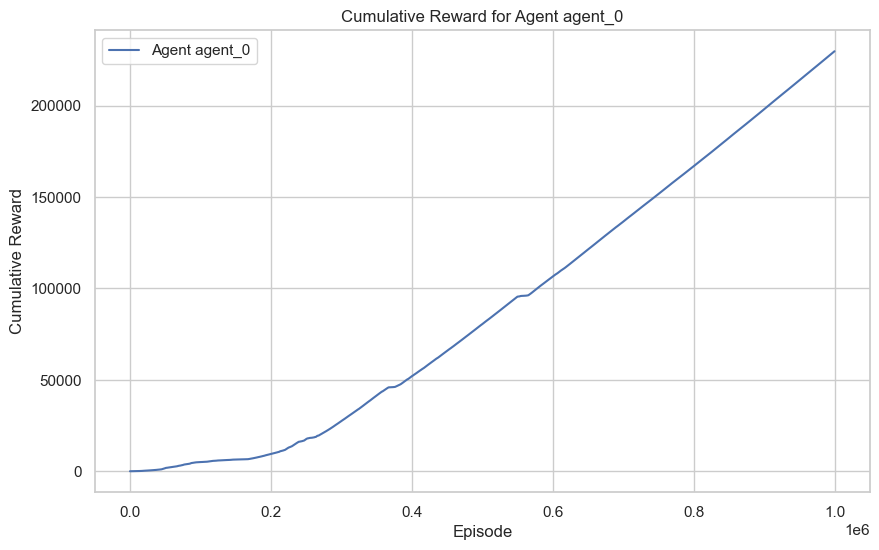

In [14]:
# Plot cumulative reward for a specific agent
agent_to_plot = game.agents[0]  # Replace with the specific agent you want to plot
cumulative_rewards = np.cumsum(reward_list[agent_to_plot])  # Calculate cumulative rewards

plt.figure(figsize=(10, 6))
plt.plot(cumulative_rewards, label=f"Agent {agent_to_plot}")
plt.xlabel("Episode")
plt.ylabel("Cumulative Reward")
plt.title(f"Cumulative Reward for Agent {agent_to_plot}")
plt.legend()
plt.show()

In [15]:
run(game, agents, verbose=True, render=True)

c:\Users\marrt\miniconda3\envs\pettingzoo_games\Lib\site-packages\pyglet\libs\win32\__init__.py:318: UserWarning: Could not set COM MTA mode. Unexpected behavior may occur.
  warnings.warn("Could not set COM MTA mode. Unexpected behavior may occur.")


Agent agent_0 reward: 0
Agent agent_0 observe: [3. 3. 4. 8. 3. 2. 6. 8. 2. 0. 2. 2.]
Agent agent_1 reward: 0
Agent agent_1 observe: [3. 3. 4. 8. 3. 2. 0. 2. 2. 6. 8. 2.]
Agent agent_0 reward: 0
Agent agent_0 observe: [3. 3. 4. 8. 3. 2. 7. 8. 2. 0. 3. 2.]
Agent agent_1 reward: 0
Agent agent_1 observe: [3. 3. 4. 8. 3. 2. 0. 3. 2. 7. 8. 2.]
Agent agent_0 reward: 0
Agent agent_0 observe: [3. 3. 4. 8. 3. 2. 8. 8. 2. 1. 3. 2.]
Agent agent_1 reward: 0
Agent agent_1 observe: [3. 3. 4. 8. 3. 2. 1. 3. 2. 8. 8. 2.]
Agent agent_0 reward: 0
Agent agent_0 observe: [3. 3. 4. 8. 3. 2. 9. 8. 2. 1. 4. 2.]
Agent agent_1 reward: 0
Agent agent_1 observe: [3. 3. 4. 8. 3. 2. 1. 4. 2. 9. 8. 2.]
Agent agent_0 reward: 0
Agent agent_0 observe: [ 3.  3.  4.  8.  3.  2. 10.  8.  2.  1.  5.  2.]
Agent agent_1 reward: 0
Agent agent_1 observe: [ 3.  3.  4.  8.  3.  2.  1.  5.  2. 10.  8.  2.]
Agent agent_0 reward: 0
Agent agent_0 observe: [ 3.  3.  4.  8.  3.  2. 10.  7.  2.  2.  5.  2.]
Agent agent_1 reward: 0
Agent

{'agent_0': 0.3333333333333333, 'agent_1': 0}

In [12]:
from agents.centralized_q_learning import CentralizedQLearning

game = Foraging(config=None)
centralized_agent = CentralizedQLearning(game)

for episode in range(1000):
    game.reset()
    while not game.done():
        centralized_agent.step()

c:\Users\marrt\miniconda3\envs\pettingzoo_games\Lib\site-packages\gymnasium\spaces\box.py:130: UserWarning: WARN: Box bound precision lowered by casting to float32
  gym.logger.warn(f"Box bound precision lowered by casting to {self.dtype}")
c:\Users\marrt\miniconda3\envs\pettingzoo_games\Lib\site-packages\gymnasium\utils\passive_env_checker.py:275: UserWarning: WARN: The reward returned by `step()` must be a float, int, np.integer or np.floating, actual type: <class 'list'>
  logger.warn(


In [13]:
# Initialize centralized Q-learning agent
from agents.centralized_q_learning import CentralizedQLearning

game = Foraging(config="Foraging-5x5-2p-3f-v3")
centralized_agent = CentralizedQLearning(game)

# Track cumulative rewards
cumulative_rewards = []

# Training loop
for episode in range(100000):  # Adjust the number of episodes as needed
    game.reset()
    episode_reward = 0  # Track total reward for the episode
    
    while not game.done():
        centralized_agent.step()
        # Sum up rewards for all agents
        episode_reward += sum(game.rewards[agent] for agent in game.agents)
    
    cumulative_rewards.append(episode_reward)
    print(f"Episode {episode + 1}: Total Reward = {episode_reward}")

Episode 1: Total Reward = 0.5
Episode 2: Total Reward = 1.0
Episode 3: Total Reward = 0.5
Episode 4: Total Reward = 1.0
Episode 5: Total Reward = 1.0
Episode 6: Total Reward = 0.5
Episode 7: Total Reward = 0.5
Episode 8: Total Reward = 0.5
Episode 9: Total Reward = 1.0
Episode 10: Total Reward = 1.0
Episode 11: Total Reward = 0.5
Episode 12: Total Reward = 0.5
Episode 13: Total Reward = 1.0
Episode 14: Total Reward = 1.0
Episode 15: Total Reward = 1.0
Episode 16: Total Reward = 1.0
Episode 17: Total Reward = 1.0
Episode 18: Total Reward = 0.5
Episode 19: Total Reward = 0.5
Episode 20: Total Reward = 0.5
Episode 21: Total Reward = 1.0
Episode 22: Total Reward = 0.5
Episode 23: Total Reward = 1.0
Episode 24: Total Reward = 0.5
Episode 25: Total Reward = 0.5
Episode 26: Total Reward = 0.5
Episode 27: Total Reward = 1.0
Episode 28: Total Reward = 1.0
Episode 29: Total Reward = 0.5
Episode 30: Total Reward = 1.0
Episode 31: Total Reward = 0.5
Episode 32: Total Reward = 1.0
Episode 33: Total

KeyboardInterrupt: 

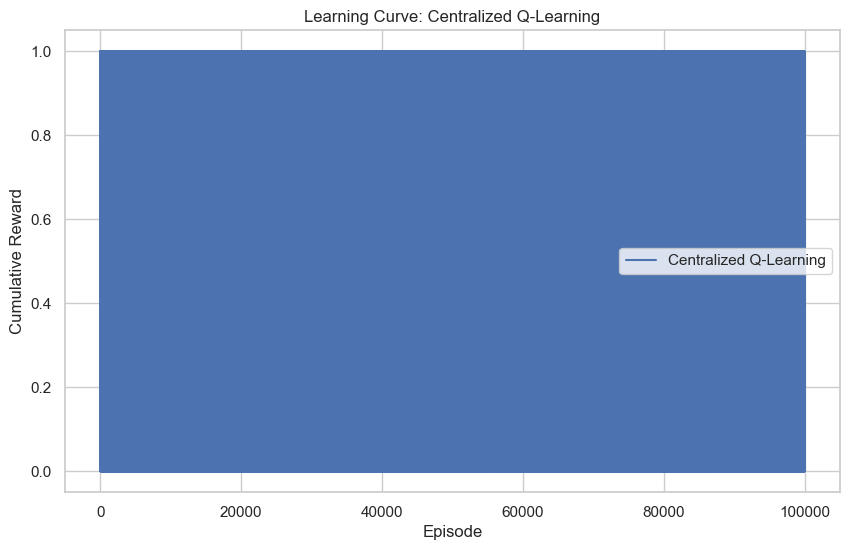

In [ ]:
import matplotlib.pyplot as plt

# Plot cumulative rewards over episodes
plt.figure(figsize=(10, 6))
plt.plot(cumulative_rewards, label="Centralized Q-Learning")
plt.xlabel("Episode")
plt.ylabel("Cumulative Reward")
plt.title("Learning Curve: Centralized Q-Learning")
plt.legend()
plt.show()

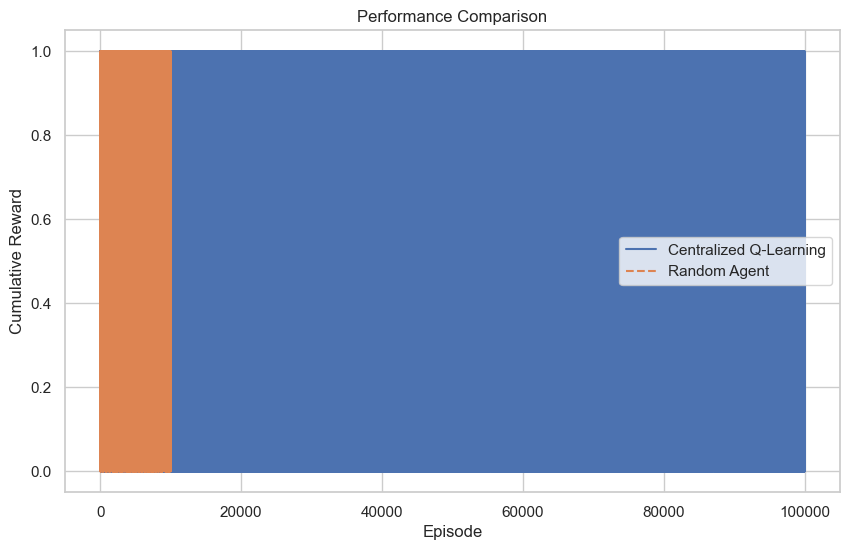

In [ ]:
from agents.random_agent import RandomAgent

# Initialize random agents
random_agents = {agent: RandomAgent(game, agent) for agent in game.agents}

# Run random agent simulation
random_rewards = []
for episode in range(10000):
    game.reset()
    episode_reward = 0
    while not game.done():
        actions = {agent: random_agents[agent].action() for agent in game.agents}
        game.step(actions)
        episode_reward += sum(game.rewards[agent] for agent in game.agents)
    random_rewards.append(episode_reward)

# Plot comparison
plt.figure(figsize=(10, 6))
plt.plot(cumulative_rewards, label="Centralized Q-Learning")
plt.plot(random_rewards, label="Random Agent", linestyle="--")
plt.xlabel("Episode")
plt.ylabel("Cumulative Reward")
plt.title("Performance Comparison")
plt.legend()
plt.show()

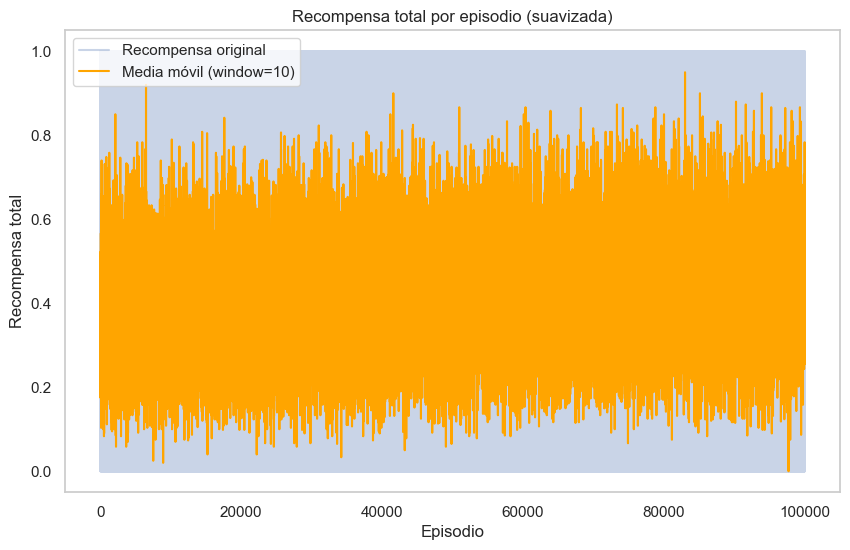

In [ ]:
def moving_average(data, window_size=10):
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

# Crear la curva suavizada
window = 10
smoothed = moving_average(cumulative_rewards, window)

# Graficar
plt.figure(figsize=(10, 6))
plt.plot(cumulative_rewards, alpha=0.3, label='Recompensa original')
plt.plot(range(window-1, len(cumulative_rewards)), smoothed, color='orange', label=f'Media móvil (window={window})')
plt.title("Recompensa total por episodio (suavizada)")
plt.xlabel("Episodio")
plt.ylabel("Recompensa total")
plt.legend()
plt.grid()
plt.show()

In [ ]:


def evaluate_policy(game, agents, n_episodes=1000, block_size=100, render=False):
    # Fijar epsilon en 0 para política greedy (sin exploración)
    for agent in agents.values():
        agent.epsilon = 0.0

    success_per_episode = []

    for episode in range(n_episodes):
        game.reset()
        total_reward = 0

        if render:
            game.render()

        while not game.done():
            actions = {agent_id: agents[agent_id].action() for agent_id in game.agents}
            game.step(actions)
            total_reward += sum(r if r is not None else 0 for r in game.rewards.values())

            if render:
                game.render()

        # Éxito si al menos una recolección ocurrió (recompensa total positiva)
        success_per_episode.append(1 if total_reward > 0 else 0)

    # Calcular porcentaje de éxito por bloque de 100 episodios
    blocks = len(success_per_episode) // block_size
    success_rate = [
        np.mean(success_per_episode[i*block_size:(i+1)*block_size])
        for i in range(blocks)
    ]

    # Graficar
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, blocks+1), success_rate, marker='o', linestyle='-')
    plt.title(f"Porcentaje de éxito cada {block_size} episodios (evaluación sin exploración)")
    plt.xlabel(f"Bloque de {block_size} episodios")
    plt.ylabel("Tasa de éxito")
    plt.ylim(0, 1.05)
    plt.grid(True)
    plt.show()

    return success_rate

In [ ]:
evaluate_policy(game, {'agent_0': centralized_agent}, n_episodes=1000, block_size=100, render=False)

AttributeError: 'CentralizedQLearning' object has no attribute 'action'

In [ ]:
init = game.env.unwrapped.field
init

array([[0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 2, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 2, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0]], dtype=int32)

In [ ]:
game.reset()
game.env.unwrapped.field

array([[0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 2, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 2, 0],
       [0, 0, 2, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0]], dtype=int32)

In [ ]:
game.env.unwrapped.field = init
game.env.unwrapped.field

array([[0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 2, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 2, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0]], dtype=int32)

In [ ]:
def _make_state(obs):
        state = str(obs.field)
        for c in ["]", "[", " ", "\n"]:
            state = state.replace(c, "")

        for a in obs.players:
            state = state + str(a.position[0]) + str(a.position[1]) + str(a.level)

        return int(state)

In [ ]:
_make_state(game.env.unwrapped)

10020000000000000000000000000000000000020000000000000751732

In [ ]:
game = game.env.unwrapped.from_obs(game.env.unwrapped) 

TypeError: 'list' object cannot be interpreted as an integer

In [ ]:
obs = game.env.unwrapped
obs

In [ ]:
game.reset()

In [ ]:
game.env.unwrapped.field = obs.field
game.env.unwrapped.players = obs.players
game.env.unwrapped.current_step = obs.current_step
game.env.unwrapped.sight = obs.sight
game.env.unwrapped._gen_valid_moves()

In [ ]:
game.step(centralized_agent.step())

TypeError: 'NoneType' object is not subscriptable